<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Modelos de Regresión</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [120]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, KFold, RepeatedKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing

In [4]:
qsar=pd.read_excel('./Datos/Table S1.xlsx', sheet_name=None, header=1)
qsar.keys()

dict_keys(['Boiling point (Tb)', 'Critical temperature (Tc)', 'Critical pressure (Pc)', 'Critical volume (Vc)', 'Density (293.15 K)', 'Cetane number （CN）', 'Research octane number (RON)', 'Motor octane number (MON)'])

In [6]:
bp=qsar['Boiling point (Tb)']
bp

,Compound,CAS,Tb / K,ACR(1),NCR(2),BIC(3),BIR(4),USC(5),USN(6),USH(7),...,CS(29),RS(30),NN(31),CN(32),RN(33),AN(34),NO(35),CO(36),RO(37),KO(38)
0,Benzene,71-43-2,353.15,1.0,0.0,0.000,-0.667,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Propane,74-98-6,231.05,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,"Propane, 2-methyl-",75-28-5,261.45,0.0,0.0,0.333,0.000,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,"Butane, 2-methyl-",78-78-4,300.95,0.0,0.0,0.250,0.000,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,"1,3-Butadiene, 2-methyl-",78-79-5,307.15,0.0,0.0,0.250,0.000,0.250,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1-Eicosanol,629-96-9,645.15,0.0,0.0,0.000,0.000,0.000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
383,Tridecanoic acid,638-53-9,585.55,0.0,0.0,0.000,0.000,0.000,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
384,"3-Buten-2-one, 3-methyl-",814-78-8,371.15,0.0,0.0,0.250,0.000,0.125,0.0,2.0,...,0,0,0,0,0,0,0,0,0,1
385,"Butane, 2-ethoxy-2-methyl-",919-94-8,375.15,0.0,0.0,0.500,0.000,0.000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
bp.isnull().any()# Verificamos si hay datos nulos

Compound       False
CAS             True
Tb / K         False
ACR(1)         False
NCR(2)         False
BIC(3)         False
BIR(4)         False
USC(5)         False
USN(6)         False
USH(7)         False
MW(8)          False
SC(9)          False
NC(10)         False
OC(11)         False
Unnamed: 14     True
A6(1)          False
A4(2)          False
A2(3)          False
N6(4)          False
N5(5)          False
N4(6)          False
N3(7)          False
N2(8)          False
N1(9)          False
R1(10)         False
R2(11)         False
br1(12)        False
br2(13)        False
CIH1(14)       False
CIH2(15)       False
NIH(16)        False
me(17)         False
AA(18)         False
o(19)          False
m(20)          False
p(21)          False
α-br(22)       False
β-br(23)       False
br(24)         False
α-IH(25)       False
β-IH(26)       False
IH(27)         False
NS(28)         False
CS(29)         False
RS(30)         False
NN(31)         False
CN(32)         False
RN(33)       

In [10]:
bp.columns

Index(['Compound', 'CAS', 'Tb / K', 'ACR(1)', 'NCR(2)', 'BIC(3)', 'BIR(4)',
       'USC(5)', 'USN(6)', 'USH(7)', 'MW(8)', 'SC(9)', 'NC(10)', 'OC(11)',
       'Unnamed: 14', 'A6(1)', 'A4(2)', 'A2(3)', 'N6(4)', 'N5(5)', 'N4(6)',
       'N3(7)', 'N2(8)', 'N1(9)', 'R1(10)', 'R2(11)', 'br1(12)', 'br2(13)',
       'CIH1(14)', 'CIH2(15)', 'NIH(16)', 'me(17)', 'AA(18)', 'o(19)', 'm(20)',
       'p(21)', 'α-br(22)', 'β-br(23)', 'br(24)', 'α-IH(25)', 'β-IH(26)',
       'IH(27)', 'NS(28)', 'CS(29)', 'RS(30)', 'NN(31)', 'CN(32)', 'RN(33)',
       'AN(34)', 'NO(35)', 'CO(36)', 'RO(37)', 'KO(38)'],
      dtype='object')

In [12]:
bp1=bp.drop(['Unnamed: 14', 'CAS'], axis=1) # Eliminamos las columnas que contienen datos NaN
bp1.isnull().any()# Verificamos

Compound    False
Tb / K      False
ACR(1)      False
NCR(2)      False
BIC(3)      False
BIR(4)      False
USC(5)      False
USN(6)      False
USH(7)      False
MW(8)       False
SC(9)       False
NC(10)      False
OC(11)      False
A6(1)       False
A4(2)       False
A2(3)       False
N6(4)       False
N5(5)       False
N4(6)       False
N3(7)       False
N2(8)       False
N1(9)       False
R1(10)      False
R2(11)      False
br1(12)     False
br2(13)     False
CIH1(14)    False
CIH2(15)    False
NIH(16)     False
me(17)      False
AA(18)      False
o(19)       False
m(20)       False
p(21)       False
α-br(22)    False
β-br(23)    False
br(24)      False
α-IH(25)    False
β-IH(26)    False
IH(27)      False
NS(28)      False
CS(29)      False
RS(30)      False
NN(31)      False
CN(32)      False
RN(33)      False
AN(34)      False
NO(35)      False
CO(36)      False
RO(37)      False
KO(38)      False
dtype: bool

In [14]:
bp1

,Compound,Tb / K,ACR(1),NCR(2),BIC(3),BIR(4),USC(5),USN(6),USH(7),MW(8),...,CS(29),RS(30),NN(31),CN(32),RN(33),AN(34),NO(35),CO(36),RO(37),KO(38)
0,Benzene,353.15,1.0,0.0,0.000,-0.667,0.000,0.0,0.0,78,...,0,0,0,0,0,0,0,0,0,0
1,Propane,231.05,0.0,0.0,0.000,0.000,0.000,0.0,0.0,44,...,0,0,0,0,0,0,0,0,0,0
2,"Propane, 2-methyl-",261.45,0.0,0.0,0.333,0.000,0.000,0.0,0.0,58,...,0,0,0,0,0,0,0,0,0,0
3,"Butane, 2-methyl-",300.95,0.0,0.0,0.250,0.000,0.000,0.0,0.0,72,...,0,0,0,0,0,0,0,0,0,0
4,"1,3-Butadiene, 2-methyl-",307.15,0.0,0.0,0.250,0.000,0.250,0.0,0.0,68,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,1-Eicosanol,645.15,0.0,0.0,0.000,0.000,0.000,0.0,0.0,298,...,0,0,0,0,0,0,0,0,1,0
383,Tridecanoic acid,585.55,0.0,0.0,0.000,0.000,0.000,0.0,1.0,214,...,0,0,0,0,0,0,0,0,1,1
384,"3-Buten-2-one, 3-methyl-",371.15,0.0,0.0,0.250,0.000,0.125,0.0,2.0,84,...,0,0,0,0,0,0,0,0,0,1
385,"Butane, 2-ethoxy-2-methyl-",375.15,0.0,0.0,0.500,0.000,0.000,0.0,0.0,116,...,0,0,0,0,0,0,0,1,0,0


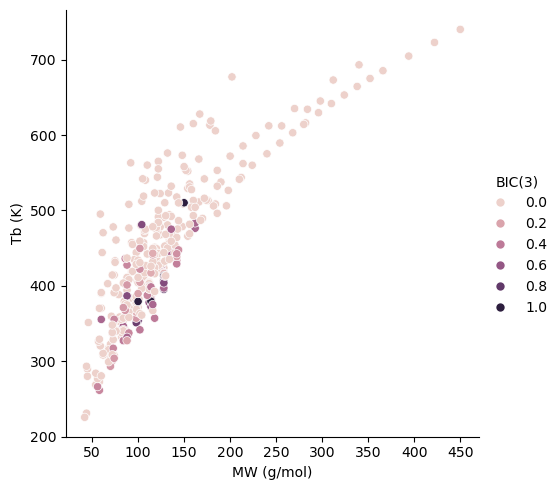

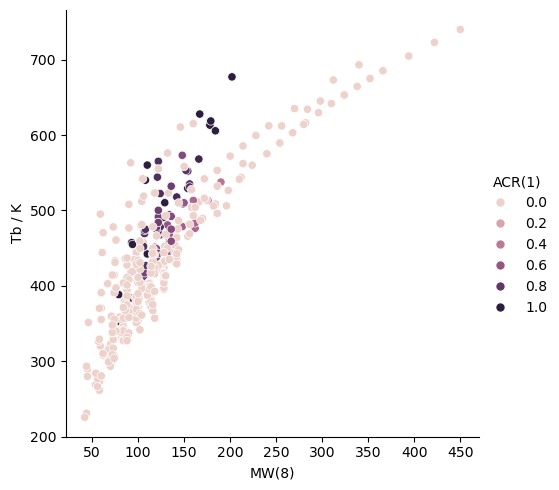

In [16]:
import seaborn as sns

g=sns.relplot(x="MW(8)", y="Tb / K", hue= 'BIC(3)', data=bp1);
g.set_axis_labels("MW (g/mol)", "Tb (K)")
g1=sns.relplot(x="MW(8)", y="Tb / K", hue= 'ACR(1)', data=bp1);
g.set_axis_labels("MW (g/mol)", "Tb (K)")

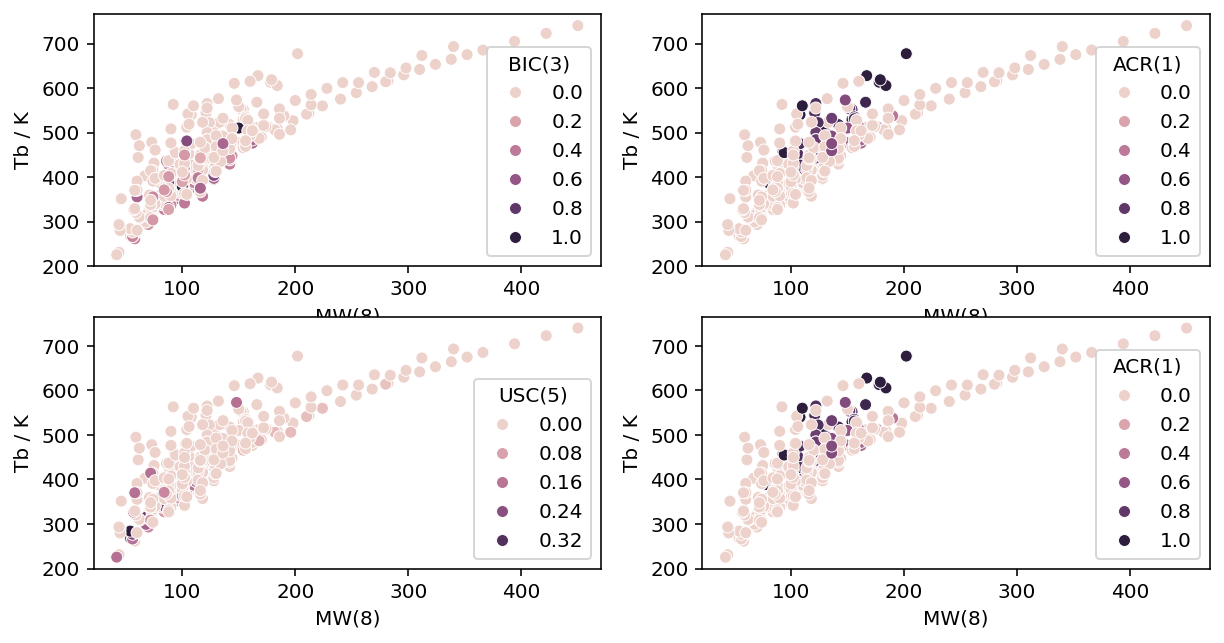

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(10, 5), dpi=144, gridspec_kw=None)
sns.scatterplot(x="MW(8)", y="Tb / K", hue= 'BIC(3)', data=bp1, ax=axes[0,0])
sns.scatterplot(x="MW(8)", y="Tb / K", hue= 'ACR(1)', data=bp1,ax=axes[0,1]);
sns.scatterplot(x="MW(8)", y="Tb / K", hue= 'USC(5)', data=bp1,ax=axes[1,0]);
sns.scatterplot(x="MW(8)", y="Tb / K", hue= 'ACR(1)', data=bp1,ax=axes[1,1]);

In [20]:
y=bp1[["Tb / K"]]
x=bp1.drop(['Compound', 'Tb / K', 'MW(8)'], axis=1)
y

,Tb / K
0,353.15
1,231.05
2,261.45
3,300.95
4,307.15
...,...
382,645.15
383,585.55
384,371.15
385,375.15


<p style="text-align:justify"><div class="alert alert-success">

**<font color=black> Scikit Learn es la biblioteca favorita en Python para realizar muchas operaciones en Machine Learning especialmente porque contiene varios métodos de tratamiento de datos entre ellos se destacan los métodos para dividir los datos en el conjunto de entrenamiento, pruebas y validación. Los más populares son:**
- **train_test_split - crea una sola división en un set de entranamiento y un set de prueba.**
- **Kfold - crea k-divisones que permiten realizar validación cruzada**
- **StratifiedKFold - crea k-divisines considerando la distribución de la variable dependiente**
- **cross_val_score - evalua el modelo a través de validación cruzada**

In [29]:
# Para demostrar como KFold separa los datos, crearemos dos modos, uno KFold 2 y 4. 
from sklearn.model_selection import KFold
kf2 = KFold(n_splits=2, shuffle=False)
kf4 = KFold(n_splits=10, shuffle=False)

In [31]:
# La función Kfold retorna los indices de los datos. En el caso nuestro de 1-83 y los indices de 0-82
# kf2 separa en dos conjunto de datos, entrenamiento y de prueba
for train_index, test_index in kf4.split(y):# Aquí estamos separando los datos de la variable independiente 
    print(train_index, test_index)              # de manera similar

[ 39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 28

In [124]:
#kf = KFold(n_splits=10, shuffle=False) # Vamos hacer 10 separaciones sin barajar en cada separación
kf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)
x_norm = preprocessing.normalize(x, norm='l1')# Normalizamos los datos
model=PLSRegression(n_components=10) # Utilizamos 10 componentes de ajuste del modelo con PLS
X_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
X_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    X_train = x_norm[train_index]
    X_test = x_norm[test_index]
    y_train = y.values[train_index]
    y_test = y.values[test_index]
    model.fit(X_train, y_train) #Training the model
    mse = mean_squared_error(y_test, model.predict(X_test))
    r2= r2_score(y_test, model.predict(X_test))
    
    # Almacenamos cada grupo en los arreglos creados
    X_traint.append(X_train) 
    X_testt.append(X_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
    
    # Entrenamos el modelo para cada separación the model
    model.fit(X_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(X_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(X_test))}")
    i += 1

MSE. 1 on the test set: 1741.9145066479664
R2. 1 on the test set: 0.8085544420202728
MSE. 2 on the test set: 2010.1995181703644
R2. 2 on the test set: 0.6246453387931953
MSE. 3 on the test set: 1599.2951869650428
R2. 3 on the test set: 0.8255351228441802
MSE. 4 on the test set: 1201.5672134366812
R2. 4 on the test set: 0.8491037203317495
MSE. 5 on the test set: 1622.9559410237198
R2. 5 on the test set: 0.8045768300597869
MSE. 6 on the test set: 1781.3217654507641
R2. 6 on the test set: 0.7417845622252071
MSE. 7 on the test set: 1521.166750694098
R2. 7 on the test set: 0.800372926464614
MSE. 8 on the test set: 1436.8113433557528
R2. 8 on the test set: 0.8148768594244931
MSE. 9 on the test set: 1009.4605555414973
R2. 9 on the test set: 0.8659158388706728
MSE. 10 on the test set: 981.0906539158461
R2. 10 on the test set: 0.8963764310088362
MSE. 11 on the test set: 1545.963267167407
R2. 11 on the test set: 0.6057672136358183
MSE. 12 on the test set: 1470.3941991723395
R2. 12 on the test se

In [126]:
y_tr=np.array(y_traint[r2s.index(max(r2s))])
y_te=np.array(y_testt[r2s.index(max(r2s))])
X_tr=np.array(X_traint[r2s.index(max(r2s))])
X_te=np.array(X_testt[r2s.index(max(r2s))])

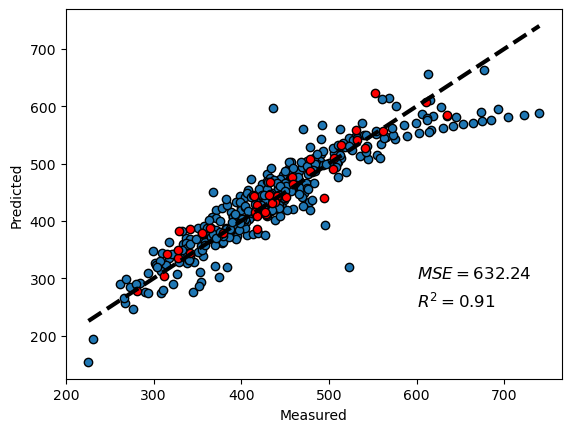

In [130]:
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicmos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(600,300, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(600, 250, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

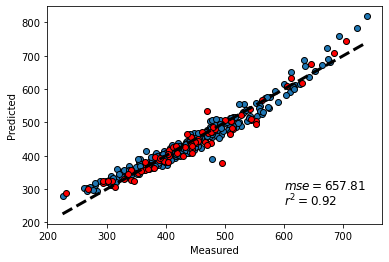

MSE = 657.81


In [11]:
# Separación de los datos en set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=8)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,300, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [12]:
def optimise_pls(X, y, xt, rs):
    
    # Definimos PLS y el número de componentes
    pls1= PLSRegression(n_components=8)
    pls1.fit(X, y)
    y_pred1 = pls1.predict(X)
    y_pred2 = pls1.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y_test, y_pred2)
    mse = mean_squared_error(y_test, y_pred2)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [13]:
# Probamos con 30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
rss = []
arr_rs = np.arange(1, 10001)
for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs, shuffle= True)
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, rs)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)
    rss.append(rs)

In [14]:
rss[np.argmax(r2s)]

1548

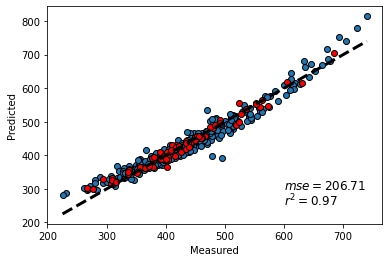

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rss[np.argmin(mses)], shuffle= True)

pls = PLSRegression(n_components=8)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,300, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

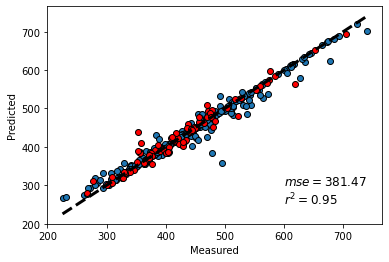

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler  
#scaler = StandardScaler()
#scaler.fit(x)
#x = scaler.transform(x)  

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, shuffle= True)

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

y_pred=svr_rbf.fit(x_train, y_train.values.ravel()).predict(x_train)
y_pred_test=svr_rbf.fit(x_train, y_train.values.ravel()).predict(x_test)
#svm1 = regr = svm.SVR()
#svm1.fit(x_train, y_train)

#y_pred = svm1.predict(x_train)
#y_pred_test = svm1.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,300, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
def optimise_svr(X, y, xt, rs):
    
    # Definimos PLS y el número de componentes
    svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
    svr_rbf.fit(X, y)
    y_pred1 = svr_rbf.predict(X)
    y_pred2 = svr_rbf.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y_test, y_pred2)
    mse = mean_squared_error(y_test, y_pred2)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [24]:
# Probamos con 30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
rss = []
arr_rs = np.arange(1, 101)
for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rs, shuffle= True)
    y_pred1, y_pred2, r2, mse, rpd = optimise_svr(x_train, y_train.values.ravel(), x_test, rs)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)
    rss.append(rs)

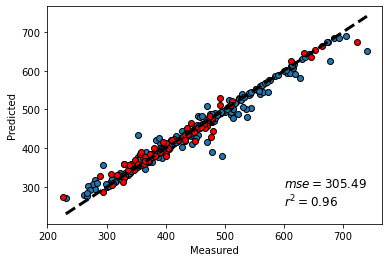

In [26]:
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=rss[np.argmin(mses)], shuffle= True)


svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

y_pred=svr_rbf.fit(x_train, y_train.values.ravel()).predict(x_train)
y_pred_test=svr_rbf.fit(x_train, y_train.values.ravel()).predict(x_test)
#svm1 = regr = svm.SVR()
#svm1.fit(x_train, y_train)

#y_pred = svm1.predict(x_train)
#y_pred_test = svm1.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,300, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [29]:
import numpy as np
from sklearn.neural_network import MLPRegressor  # Regresión lineal multicapa
from sklearn.preprocessing import StandardScaler


dataMat = np.array(x_train)
X=np.array(dataMat)
y = np.array(y_train.values.ravel())
scaler = StandardScaler() # Conversión estandarizada
#scaler.fit(X)  # Entrenar objetos estandarizados
#X = scaler.transform(X)   # Convertir conjunto de datos

# solver = 'lbfgs', método de solución MLP: L-BFGS funciona mejor en datos pequeños, Adam es más robusto, SGD tiene el mejor rendimiento cuando los parámetros se ajustan mejor (efecto de clasificación y número de iteraciones); logotipo de SGD Descenso de gradiente estocástico.
# alpha: parámetros L2: MLP puede admitir la regularización, el valor predeterminado es L2, los parámetros específicos deben ajustarse
# hidden_layer_sizes = (5, 2) capa oculta con 2 capas, 5 neuronas en la primera capa, 2 neuronas en la segunda capa), 2 capas ocultas, hay 3 redes neuronales
#clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1234, max_iter=50000) #solvers: sgd, adam, lbfgs
clf = MLPRegressor(solver='adam', hidden_layer_sizes=(64,64,64), activation="relu", random_state=1, max_iter=2000) # activation: 'relu', 'identity', 'logistic', 'softmax', 'tanh' function.
clf.fit(X, y)
y_pred_test = clf.predict(np.array(x_test))
y_pred = clf.predict(np.array(x_train))
print('resultado del pronóstico:', clf.predict(np.array(x_test)))  # Predecir un objeto de entrada

#cengindex = 0
#for wi in clf.coefs_:
#    cengindex += 1  # Indica la capa inferior de la red neuronal.
#    print('Capa% d capa de red:' % cengindex)
#    print('Dimensión de la matriz de peso:',wi.shape)
#    print('Matriz de coeficientes: \ n',wi)

resultado del pronóstico: [420.89150675 332.35425717 515.08663648 389.28272763 488.03864227
 351.60402573 409.36251065 501.77018304 339.1261512  334.58265602
 458.69931406 456.4353859  335.95610055 344.72112065 426.30775923
 377.65341126 350.52137711 469.62099127 437.75567338 647.06167704
 413.96641481 508.90846446 477.51268265 380.63101292 320.9633388
 462.74033504 451.48166806 367.90016081 460.34492804 395.54165645
 452.59137166 407.64478804 356.65269965 433.39171318 362.9138828
 374.99038372 459.34325473 398.20114413 385.48908802 384.97680839
 409.7610825  323.30589383 434.8199342  451.04532543 623.87857652
 349.28981072 403.71178492 450.04280175 473.01245943 378.49897744
 332.25211744 661.42559269 438.09251147 438.44150707 480.24358711
 378.00651045 457.2173559  390.09887969 474.34657412 368.15814955
 457.24823636 325.81118498 480.71151779 437.35191318 435.04027382
 356.60983961 361.96089399 675.16406069 730.59454043 327.82137347
 296.62011279 238.89542213 500.09497584 434.14128553

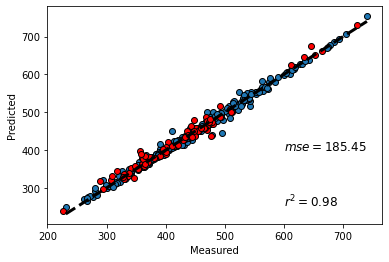

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,400, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [33]:
tf.random.set_seed(1)  #first we set random seed
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),tf.keras.layers.Dense(64, activation = tf.keras.activations.relu), tf.keras.layers.Dense(1)]);
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(), #stochastic GD
              metrics = ['mae']);
model.fit( x_train, y_train, epochs = 100, verbose=0)
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

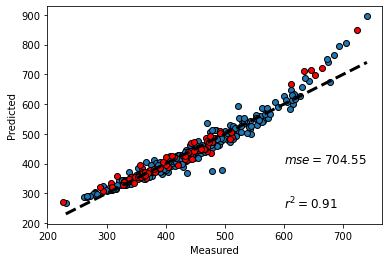

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(600,400, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(600,250, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()